In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data/ElectricCarData_Clean.csv')
# df = pd.read_csv('../Data/ElectricCarData_Clean.csv') # If "Data" folder is in a different directory relative to your current working directory, you can use the following syntax:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [4]:
df.isna().sum() # NO Nulls

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [5]:
brand_names = df['Brand'].unique() # Takes only brands mentioned and does not repeat them
print(brand_names)

['Tesla ' 'Volkswagen ' 'Polestar ' 'BMW ' 'Honda ' 'Lucid ' 'Peugeot '
 'Audi ' 'Mercedes ' 'Nissan ' 'Hyundai ' 'Porsche ' 'MG ' 'Mini ' 'Opel '
 'Skoda ' 'Volvo ' 'Kia ' 'Renault ' 'Mazda ' 'Lexus ' 'CUPRA ' 'SEAT '
 'Lightyear ' 'Aiways ' 'DS ' 'Citroen ' 'Jaguar ' 'Ford ' 'Byton '
 'Sono ' 'Smart ' 'Fiat ']


In [6]:
interest = df[['Brand', 'Model', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm']] # data im interested in

# I clearly have a lot of brands and more models of each brand, 
# perhaps its best I see which model of each brand has the highest of teach oclumn?

In [7]:
max_interest = interest.groupby('Brand').agg({'TopSpeed_KmH': 'max', 'Range_Km': 'max', 'Efficiency_WhKm': 'max'}).sort_values(by='TopSpeed_KmH')

max_interest_tail = max_interest.tail(10)
print(max_interest_tail)

           TopSpeed_KmH  Range_Km  Efficiency_WhKm
Brand                                             
Byton               190       400              244
Nissan              200       440              232
Jaguar              200       365              232
BMW                 200       450              206
Mercedes            200       370              273
Polestar            210       400              181
Audi                240       425              270
Lucid               250       610              180
Porsche             260       425              223
Tesla               410       970              267


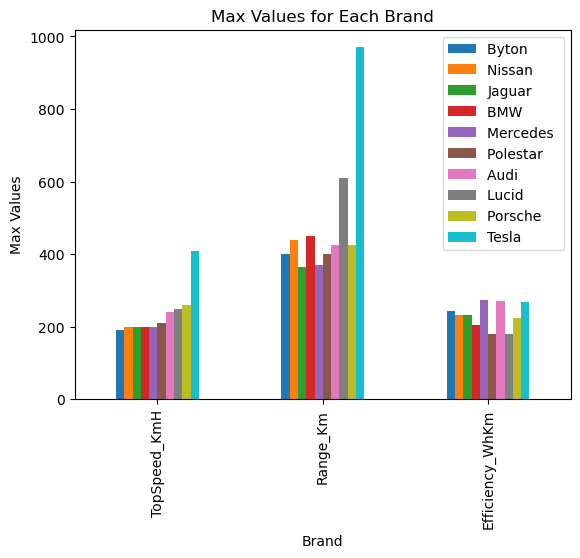

In [8]:
import matplotlib.pyplot as plt
max_interest_transposed = max_interest_tail.transpose()# Transpose the DataFrame to have 'Brand' as columns and max values as rows
max_interest_transposed.plot(kind='bar')# Create a bar graph

plt.xlabel('Brand')# Add labels and title
plt.ylabel('Max Values')
plt.title('Max Values for Each Brand')
plt.legend()
plt.show()

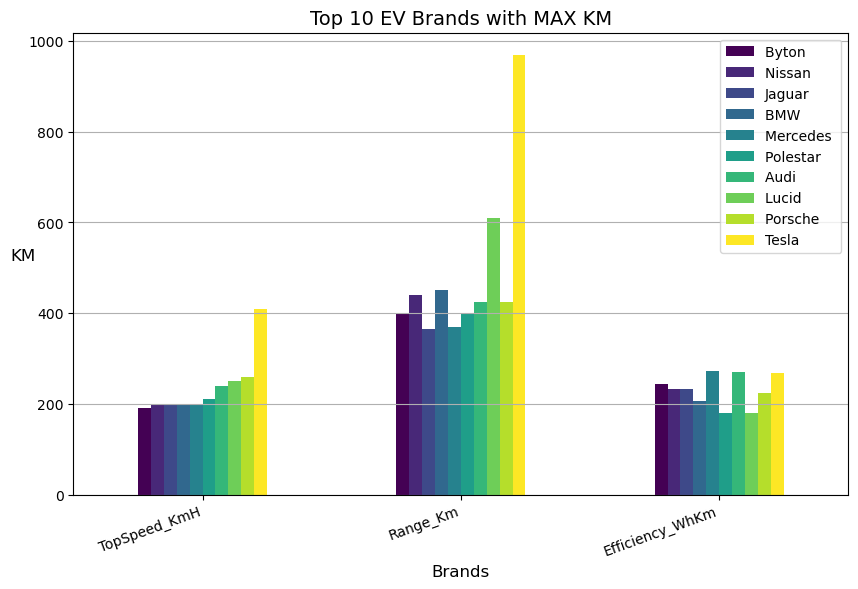

In [9]:
#Lets show which brands have the cars with the best range, we'll find out the car model next.
ax = max_interest_transposed.plot(kind='bar', figsize=(10, 6), colormap='viridis') # Create bar graph

# labels and title
plt.xlabel('Brands', fontsize=12)
plt.ylabel('KM', fontsize=12, rotation=0)
plt.title('Top 10 EV Brands with MAX KM', fontsize=14)

plt.xticks(rotation=20, ha='right') # Rotate x-axis labels for readability
ax.legend(title='') # Remove legend title WHICH SAYS BRAND
plt.grid(axis='y', linestyle='-') # Add grid lines
plt.show()


In [10]:
# Now lets see the car models for the tail end of these brands
interest


,Brand,Model,TopSpeed_KmH,Range_Km,Efficiency_WhKm
0,Tesla,Model 3 Long Range Dual Motor,233,450,161
1,Volkswagen,ID.3 Pure,160,270,167
2,Polestar,2,210,400,181
3,BMW,iX3,180,360,206
4,Honda,e,145,170,168
...,...,...,...,...,...
98,Nissan,Ariya 63kWh,160,330,191
99,Audi,e-tron S Sportback 55 quattro,210,335,258
100,Nissan,Ariya e-4ORCE 63kWh,200,325,194
101,Nissan,Ariya e-4ORCE 87kWh Performance,200,375,232


In [11]:
# Spesifify model and range categories only
top_10_models = interest.sort_values('Range_Km', ascending=False).head(10)
top_10_models = top_10_models.drop(['Efficiency_WhKm', 'TopSpeed_KmH'], axis=1)
top_10_models

,Brand,Model,Range_Km
51,Tesla,Roadster,970
33,Tesla,Cybertruck Tri Motor,750
5,Lucid,Air,610
48,Lightyear,One,575
40,Tesla,Model S Long Range,515
59,Tesla,Model S Performance,505
67,Tesla,Cybertruck Dual Motor,460
13,BMW,i4,450
64,Ford,Mustang Mach-E ER RWD,450
54,Tesla,Model X Long Range,450


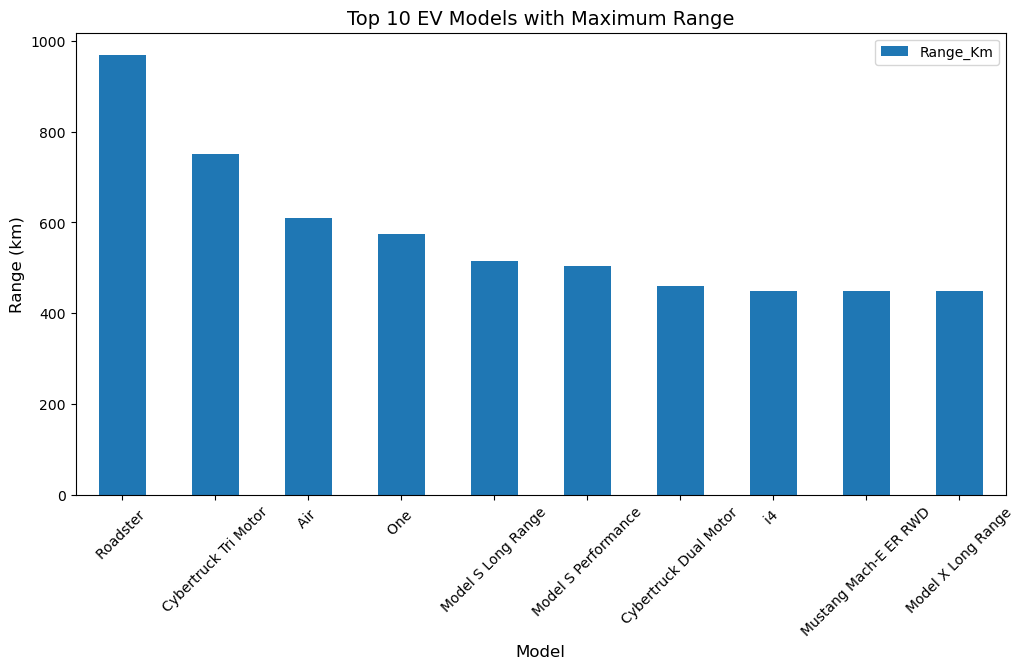

In [12]:
top_10_models.plot(kind='bar', x='Model', y='Range_Km', figsize=(12, 6), rot=45)

# Add labels and title
plt.xlabel('Model', fontsize=12)
plt.ylabel('Range (km)', fontsize=12)
plt.title('Top 10 EV Models with Maximum Range', fontsize=14)
plt.show()


In [13]:
# Find out what else you can explore..

In [14]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


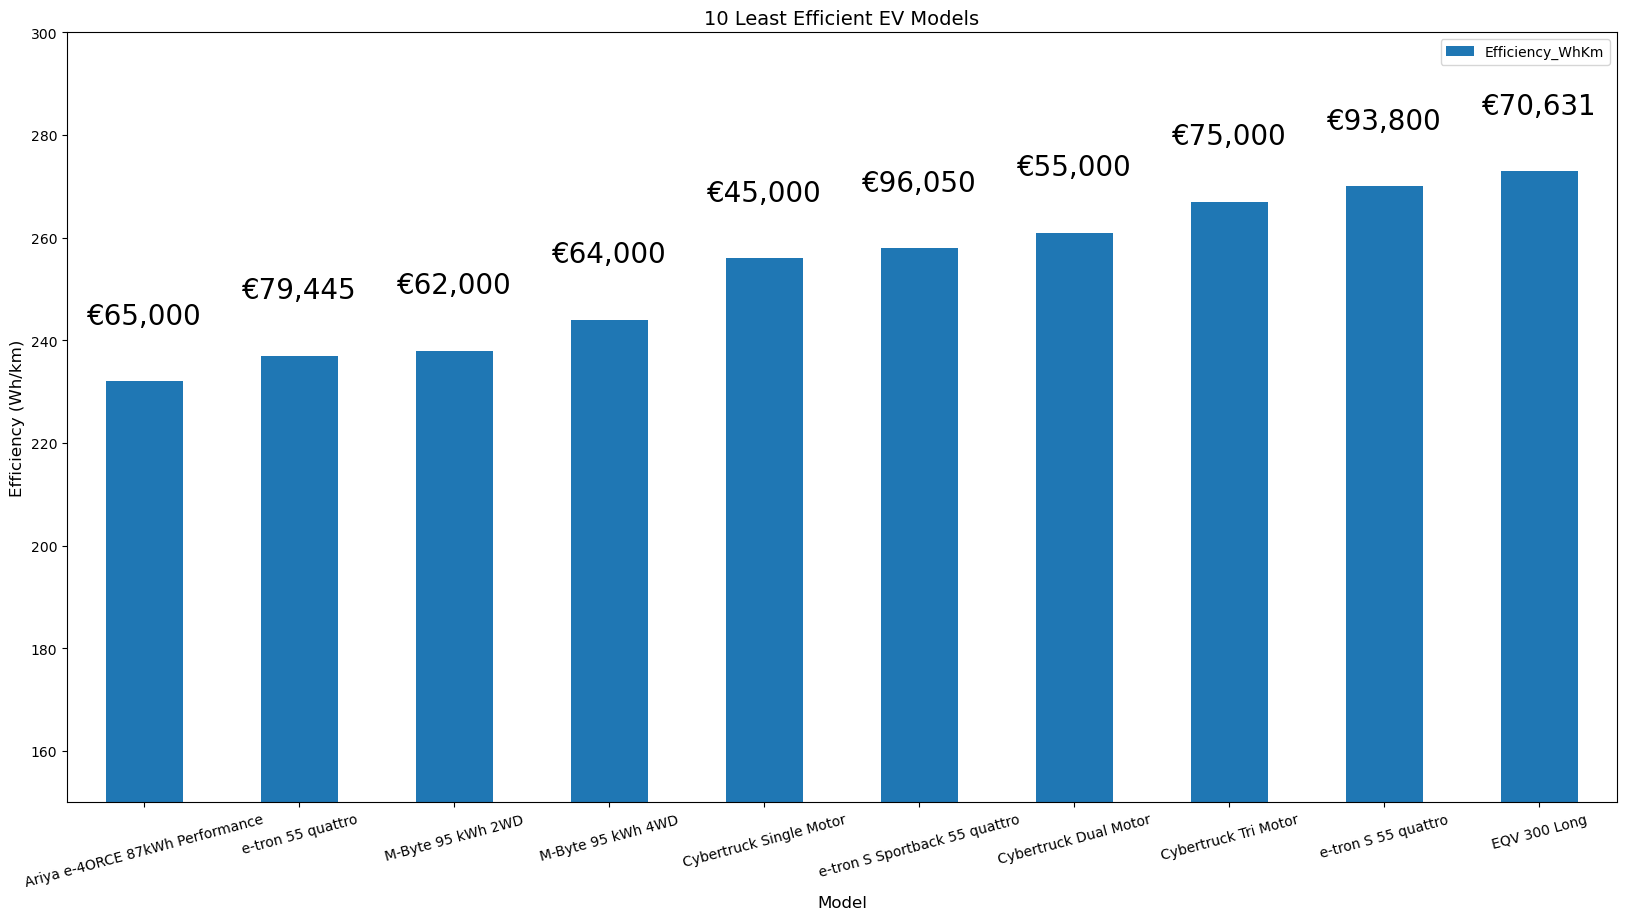

In [15]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Efficiency_WhKm' in ascending order to get the 10 least efficient cars
worst_efficiency_cars = df.sort_values('Efficiency_WhKm').tail(10)

fig, ax = plt.subplots(figsize=(20, 10))
worst_efficiency_cars.plot(kind='bar', x='Model', y='Efficiency_WhKm', ax=ax)

# labels and title
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Efficiency (Wh/km)', fontsize=12)
ax.set_title('10 Least Efficient EV Models', fontsize=14)
ax.set_ylim(bottom=150, top=300)
ax.set_xticklabels(worst_efficiency_cars['Model'], rotation=15)

# price annotation
for i, (index, row) in enumerate(worst_efficiency_cars.iterrows()):
    price_text = "€{:,.0f}".format(row['PriceEuro'])
    ax.text(i, row['Efficiency_WhKm'] + 10, price_text, ha='center', va='bottom', fontsize=20,)

plt.show()

In [16]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [17]:
rapid_charge_counts = df[df['RapidCharge'] == 'Yes'].groupby('Brand').size().sort_values(ascending=False).head(10)
rapid_charge_counts

Brand
Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Porsche         5
Kia             5
BMW             4
Ford            4
Mercedes        3
dtype: int64

In [18]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


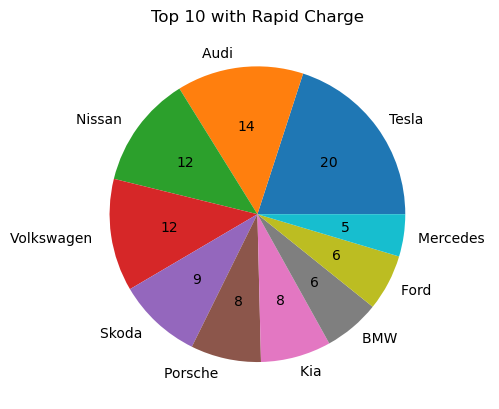

In [19]:
rapid_charge_counts = df[df['RapidCharge'] == 'Yes'].groupby('Brand').size().sort_values(ascending=False).head(10)

plt.pie(
    rapid_charge_counts.values,  # Values for each slice (counts of "Yes" entries)
    labels=rapid_charge_counts.index,  # Brand name for each slice
    autopct='%1.0f'  # Formatting for autopct: percentage format with no decimal places
)

plt.title('Top 10 with Rapid Charge')
pie_chart = plt.gcf()
pie_chart
pie_chart.savefig('rapid_charge_pie_chart.png')

In [20]:
print(df.columns)
print(df['Range_Km'])

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')
0      450
1      270
2      400
3      360
4      170
      ... 
98     330
99     335
100    325
101    375
102    400
Name: Range_Km, Length: 103, dtype: int64


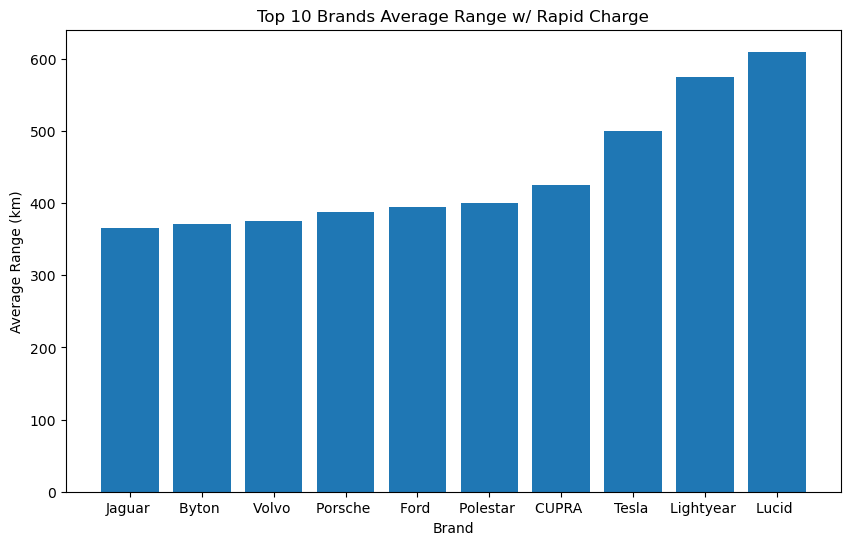

In [21]:
# Group by 'Brand' and calculate the average 'Range_Km' for each 
avg_range_by_brand = df.groupby('Brand')['Range_Km'].mean().reset_index()
avg_range_by_brand

top_10_brands = avg_range_by_brand.nlargest(10, 'Range_Km')# Filter the top 10 brands with the highest average range
top_10_brands

# Filter the original DataFrame to get the models for the top 10 brands
top_10_models = df.merge(top_10_brands, on='Brand')
top_10_models

# Group by 'Brand' and calculate the average 'Range_Km' for each brand with rapid charge
avg_range_with_rapid_charge = top_10_models[top_10_models['RapidCharge'] == 'Yes'].groupby('Brand')['Range_Km_x'].mean().reset_index()
avg_range_with_rapid_charge

# Sort the result in ascending order
avg_range_with_rapid_charge = avg_range_with_rapid_charge.sort_values('Range_Km_x')

plt.figure(figsize=(10, 6))
plt.bar(avg_range_with_rapid_charge['Brand'], avg_range_with_rapid_charge['Range_Km_x'])
plt.xlabel('Brand')
plt.ylabel('Average Range (km)')
plt.title('Top 10 Brands Average Range w/ Rapid Charge')
t10_brands_w_arange = plt.gcf()
t10_brands_w_arange.savefig('t10_brands_w_arange.png')

In [22]:
# VVV COmbine both bar graphs as below VVV

In [23]:
type(t10_brands_w_arange)

matplotlib.figure.Figure

In [24]:
type(pie_chart)
# Nice! we saved our fig properly! Now lets put those two into subplots

matplotlib.figure.Figure

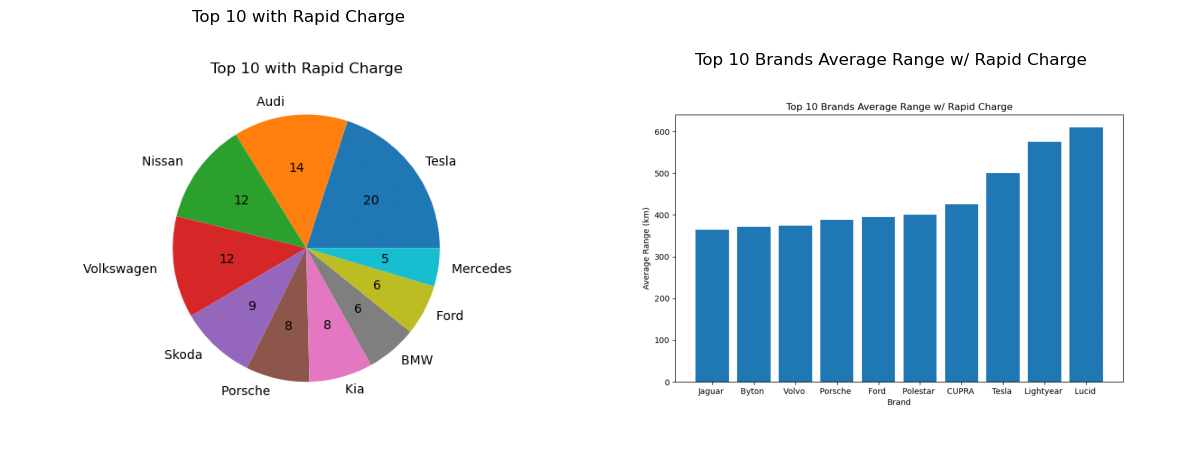

In [30]:
# Creating a 1x2 subplot layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Draw the pie chart on the first subplot
ax1.imshow(plt.imread('rapid_charge_pie_chart.png'))
ax1.axis('off')  # Hide axis
ax1.set_title('Top 10 with Rapid Charge')  # Replace with your title

# Draw the bar graph on the second subplot
ax2.imshow(plt.imread('t10_brands_w_arange.png'))
ax2.axis('off')  # Hide axis
ax2.set_title('Top 10 Brands Average Range w/ Rapid Charge')  # Replace with your title

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()